# Investigate the potential bias that movie review sites have
Based on compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers
Study done by [FiveThirtyEight](http://fivethirtyeight.com/)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

reviews = pd.read_csv("fandango_scores.csv")
reviews
norm_reviews = reviews[["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm","Fandango_Ratingvalue",
"Fandango_Stars"]]
norm_reviews[:1]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


### Create a useful bar plot displaying the results above
- specify the number and positions of the bars and axis labels -----> arange()
- specify bar heights based on a list of values passed in -----> num_cols
- the widths of the bars

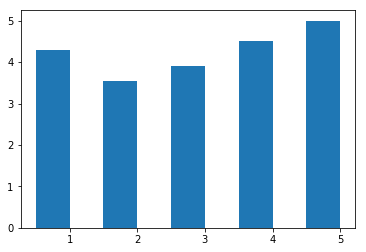

In [15]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

# Generate a single subplot and return both the Figure and Axes object
fig, ax = plt.subplots()

# Generate the positions of the left side of the bar labels spaced 0.75 from each other
bar_positions = arange(5) + 0.75

# Height of bar to show the average rating for the first movie in the dataset.
bar_heights = norm_reviews[num_cols].iloc[0].values

# Axes.bar() method has 2 required parameters, left and height; the third param (optional) is bar width
ax.bar(bar_positions, bar_heights, 0.5)

# Shows Bar Plot without labels
plt.show()

##### Continuing from code above
- Set ticks ---> Axes.set_xticks()
- Set the labels and rotate them ---> Axes.set_xticklabels() 
- Set the x-axis label ---> Axes.set_xlabel()
- Set y-axis label ---> Axes.set_ylabel()
- Set the plot title ---> plt.title()

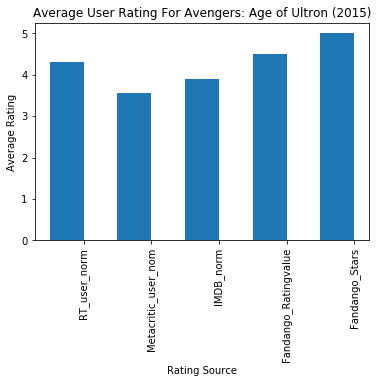

In [16]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
fig, ax = plt.subplots()
bar_positions = arange(5) + 0.75
bar_heights = norm_reviews[num_cols].iloc[0].values
ax.bar(bar_positions, bar_heights, 0.5)


# CONTINUING FROM HERE
tick_positions = range(1,6)

ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

### Create a horizontal bar plot

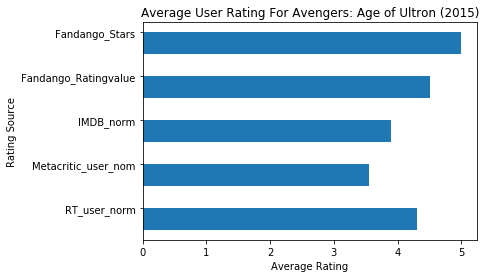

In [17]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
# Create a single subplot
fig, ax = plt.subplots()
bar_positions = arange(5) + 0.75
bar_widths = norm_reviews[num_cols].iloc[0].values
tick_positions = range(1,6)

ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

### Create a Scatter Plot

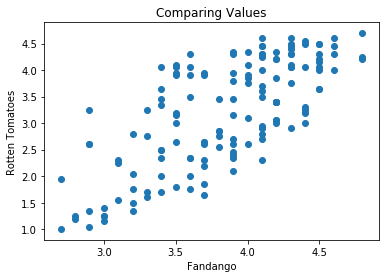

In [18]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.title("Comparing Values")

plt.show()

# The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango 
# and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are 
# multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

### Create two Scatter Plots but reverse the x and y axes to see how the results compare

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. This comparison will help us understand how much these two sites agree.

Note:  If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

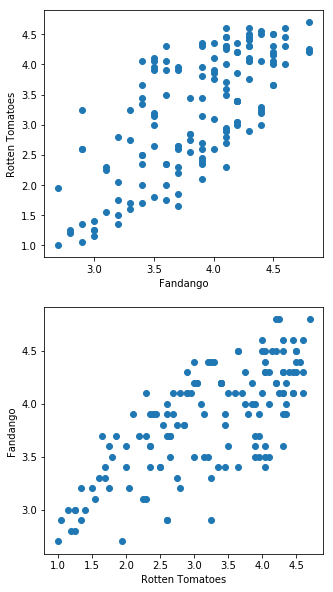

In [19]:
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

# In the 2 plots below, the ranges for both axes don't match.

### Create the Scatter Plots and make sure all plots share the same ranges in the x-axis and y-axis

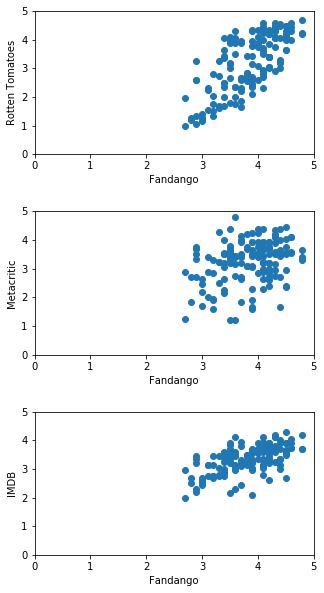

In [20]:
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

fig.subplots_adjust(hspace=.4) # Add horizontal space between plots
plt.show()

Data Quest Observations
- IMDB and Fandango are the most similar
- user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango
- user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango.
- User ratings from Metacritic and Rotten Tomatoes range from 1 to 5
- User ratings from Fandango range approximately from 2.5 to 5
- IMDB range is approximately from 2 to 4.5.

### Compare the frequency distributions of user ratings from Fandango with those from IMDB using tables.

In [21]:
fand_freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fand_freq_counts.sort_index()

imdb_freq_counts = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_freq_counts.sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values. 
- start by dividing the range of possible values into a series of fixed length intervals, called bins 
    - 0.0 - 0.5
    - 0.5 - 1.0
    - 1.0 - 1.5
    etc.
- then sum the frequencies for the values that fall into each bin. 

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a **histogram**.

### Use a histogram to plot the bins and frequency sums as a bar plot

Axes.hist(interable_object, range=(0, 5))

(use the _range_ parameter to specify the range we want matplotlib to focus on)

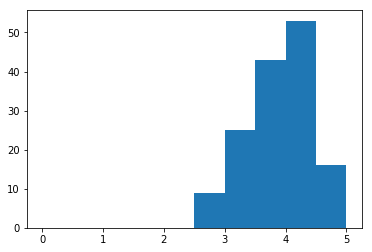

In [22]:
fig, ax = plt.subplots()

ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))

plt.show()

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. 

- Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. 
- The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. 
- bar plots also have gaps between the bars, to emphasize that the values are discrete. Histograms don't (see plot above).

#### What percent of the ratings are contained in the 2.0 to 4.0 range?

Generate histograms using 20 bins for all four columns.

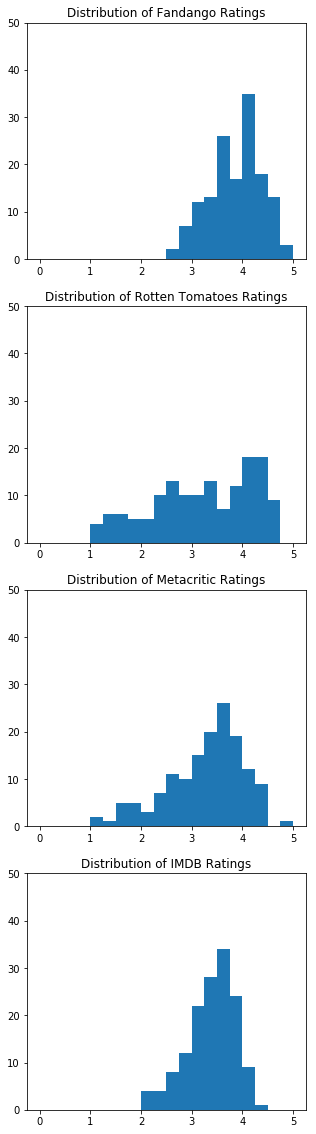

In [23]:
# increase the number of bins from 10 to 20 for improved resolution of the distribution
fig = plt.figure(figsize=(5, 20))

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_ylim(0, 50)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_ylim(0, 50)
ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_ylim(0, 50)
ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0, 5))
ax3.set_title("Distribution of Metacritic Ratings")

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_ylim(0, 50)
ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')

plt.show()

#### Findings
- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

*Note*: While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites.

### To visualize quartiles, use a _box plot_, also referred to as a _box-and-whisker plot_.

The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.



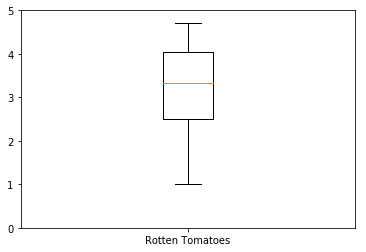

In [25]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0, 5)
xlabel = ['Rotten Tomatoes']
ax.set_xticklabels(xlabel)

plt.show()

#### Findings
- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6

### Compare the lower and upper ranges with those for the other columns by generating multiple box-and-whisker diagrams in the same box plot

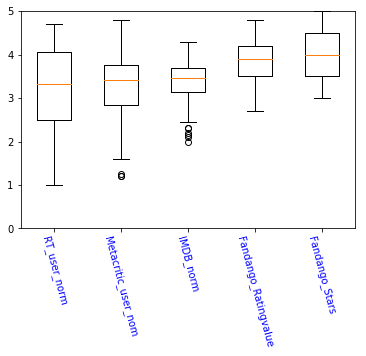

In [45]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=285, color='blue')
ax.set_ylim(0, 5)

plt.show()

#### Findings
- user ratings from Rotten Tomatoes and Metacritic span a larger range of values
- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values
- a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called _outliers_ or extreme values. _Outliers_ are usually treated as abnormal values and affect the overall observation of the data set to its very high or low value.